In [1]:
%matplotlib inline

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing, load_digits

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, RANSACRegressor, LogisticRegression

# Linear and Logistic Regression

## EDA

In [3]:
dataset = fetch_california_housing(as_frame=True)

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
house_prices_df = dataset.frame

In [7]:
house_prices_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


MedHouseVal is tagret:  $\tilde{y}$= f(x).

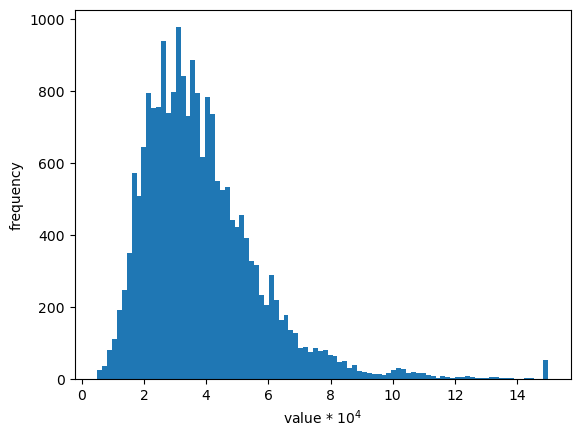

In [8]:
plt.hist(house_prices_df.MedInc, bins = "fd")
plt.xlabel("value * $ 10^{4} $")
plt.ylabel("frequency")
plt.show()

In [9]:
house_prices_df[house_prices_df.MedInc > 15].sort_values("MedInc")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1566,15.0001,2.0,22.222222,2.222222,25.0,2.777778,37.74,-121.96,3.50000
8850,15.0001,37.0,9.333333,1.037801,809.0,2.780069,34.09,-118.41,5.00001
8851,15.0001,40.0,9.600000,1.059459,1024.0,2.767568,34.09,-118.42,5.00001
8852,15.0001,48.0,9.729839,1.052419,770.0,3.104839,34.08,-118.42,5.00001
8853,15.0001,52.0,9.867036,1.091413,1163.0,3.221607,34.07,-118.41,5.00001
8854,15.0001,52.0,8.710145,1.028986,408.0,2.956522,34.07,-118.41,5.00001
8878,15.0001,52.0,8.000000,0.997333,1143.0,3.048000,34.04,-118.50,5.00001
10673,15.0001,13.0,7.842900,0.993958,1865.0,2.817221,33.62,-117.85,5.00001
10760,15.0001,15.0,8.062044,1.003650,735.0,2.682482,33.62,-117.87,5.00001
11520,15.0001,14.0,8.354232,1.037618,964.0,3.021944,33.72,-118.06,5.00001


Аlmost all values ​​for MedInc = 15.0001 have a value for MedHouseVal = 5.00001.

Lets check correlation in df:

In [10]:
house_prices_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


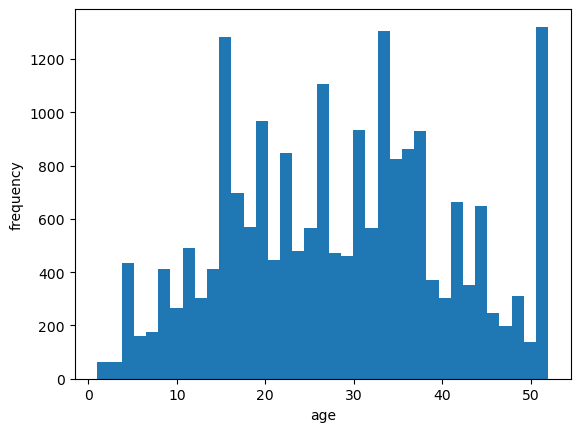

In [11]:
plt.hist(house_prices_df.HouseAge, bins = "fd")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

In [12]:
house_prices_df.HouseAge.value_counts()

HouseAge
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64

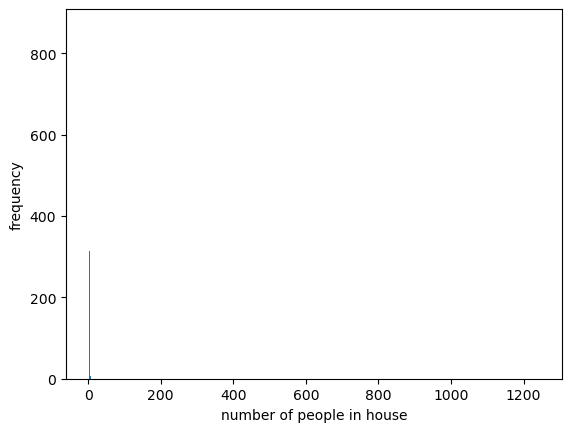

In [13]:
plt.hist(house_prices_df.AveOccup, bins = "fd")
plt.xlabel("number of people in house")
plt.ylabel("frequency")
plt.show()

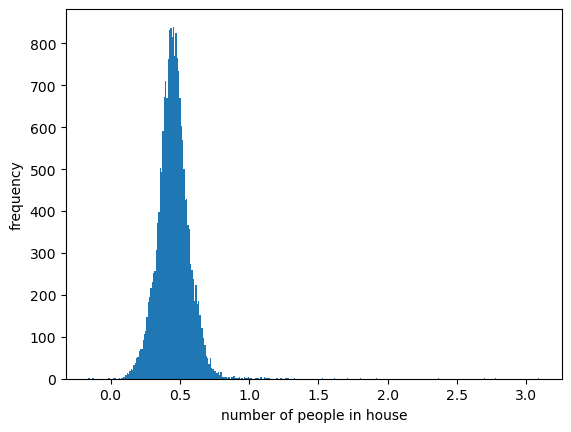

In [14]:
'''
    The logarithmic transformation is often used in data analysis when the distribution of values ​​is asymmetric or skewed.
    If most values ​​are small, but there are a few large values ​​(outliers), a logarithmic transformation will make the 
    distribution more balanced and closer to normal. This makes the analysis easier and the histogram more informative.
'''
plt.hist(np.log10(house_prices_df.AveOccup), bins = "fd")
plt.xlabel("number of people in house")
plt.ylabel("frequency")
plt.show()

In [15]:
# outliars:
house_prices_df[np.log10(house_prices_df.AveOccup) > 1.5].sort_values("AveOccup")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.83300
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45,5.00001
16420,5.7485,26.0,5.366667,0.900000,1542.0,51.400000,37.89,-121.29,1.62500
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.62500
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59,1.54600
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.25000
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.50000
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.37500


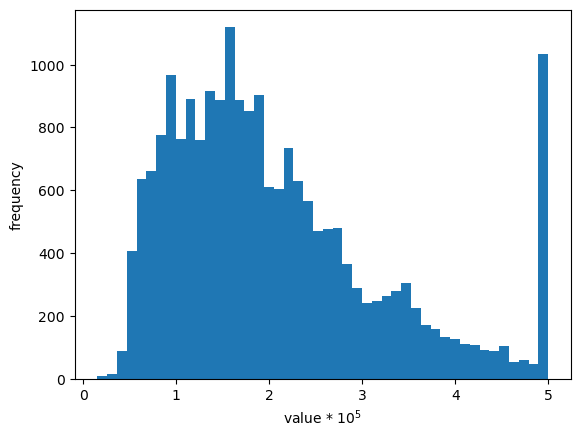

In [16]:
# lets check the target:
plt.hist(house_prices_df.MedHouseVal, bins = "fd")
plt.xlabel("value * $ 10^{5} $")
plt.ylabel("frequency")
plt.show()

In [17]:
house_prices_df[house_prices_df.MedHouseVal > 5].MedHouseVal.unique()

array([5.00001])

I make the assumption that these are outliars and remove them.

In [18]:
house_prices_df = house_prices_df[house_prices_df.MedHouseVal <= 5]

## Data Modeling

### Linear Regression

In [19]:
hp_model = LinearRegression()

In [20]:
hp_attributes = house_prices_df.drop(columns = ["MedHouseVal"])
house_values = house_prices_df.MedHouseVal # target

In [21]:
hp_model.fit(hp_attributes, house_values)

LinearRegression()

In [22]:
hp_model.coef_

array([ 4.32039991e-01,  8.17895781e-03, -1.10512216e-01,  6.13453908e-01,
        4.59347590e-06, -3.44772055e-03, -3.79403380e-01, -3.95909847e-01])

In [23]:
hp_model.feature_names_in_

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude'], dtype=object)

In [24]:
list(zip(hp_model.feature_names_in_, hp_model.coef_))

[('MedInc', 0.43203999075155286),
 ('HouseAge', 0.008178957814135905),
 ('AveRooms', -0.11051221552017831),
 ('AveBedrms', 0.6134539079605437),
 ('Population', 4.59347589652632e-06),
 ('AveOccup', -0.0034477205518171914),
 ('Latitude', -0.3794033795650465),
 ('Longitude', -0.3959098468967242)]

This is non scaled version of results from the model, which is not good.

In column 'AveOccup' the numbers are from 0 to 1200, this means that there will be values ​​(the big numbers) that will affect the model much more than others. Small changes around 1000 will have 1000 times more effect on the model than small changes around 1. What matters is how important the variable is, not its value. I should normalize the data, so that there are no numerical errors.

**Normalize the data with MinMaxScaler:**

In [25]:
# the distribution remains the same (бъ дефаулт: feature_range=(0, 1))
scaler = MinMaxScaler()

In [26]:
# learn the data with .fit()
# scales the values ​​to be between 0 and 1 with .transform()
hp_attributes_scaled = scaler.fit_transform(hp_attributes)

In [27]:
hp_model_scaled = LinearRegression()

In [28]:
hp_model_scaled.fit(hp_attributes_scaled, house_values)

LinearRegression()

In [29]:
list(zip(hp_model.feature_names_in_, hp_model_scaled.coef_))

[('MedInc', 6.264666273895672),
 ('HouseAge', 0.4171268485209276),
 ('AveRooms', -14.553041960731646),
 ('AveBedrms', 20.693845161869056),
 ('Population', 0.163890626512326),
 ('AveOccup', -4.284279002633811),
 ('Latitude', -3.570185801707089),
 ('Longitude', -3.974934862843117)]

The values ​​are closer to each other and I can make better assumptions. \
The model will interpret them correctly - it will correctly assess which features are important to it.

**Normalize the data with StandardScaler:**

In [30]:
z_score_attributes = StandardScaler().fit_transform(hp_attributes)

In [31]:
z_score_model = LinearRegression()

In [32]:
z_score_attributes.shape

(19675, 8)

In [33]:
z_score_model.fit(z_score_attributes, house_values)

LinearRegression()

In [34]:
list(zip(hp_model.feature_names_in_, z_score_model.coef_))

[('MedInc', 0.6784028909722378),
 ('HouseAge', 0.10230890631596909),
 ('AveRooms', -0.2533470347321329),
 ('AveBedrms', 0.27717527061724123),
 ('Population', 0.005253189350408459),
 ('AveOccup', -0.036655154221234484),
 ('Latitude', -0.8156213233862952),
 ('Longitude', -0.794217862501511)]

In [36]:
z_score_model.score(z_score_attributes, house_values)

0.5701011070331932

### RANSAC

**RANSAC** (RANdom SAmple Consensus) - Linear Regression with outliers. RANSAC is an iterative algorithm. I take part random subsample, train a model, then another random part of the data and again train a model on it (I repeat this many times). The points that fits from all models are **inliers**. Finally, a model is trained only on the inliers. The goal is to find the best model that fits the 'pure' data and ignores outliers.

In [37]:
ransac_model = RANSACRegressor()

In [38]:
ransac_model.fit(hp_attributes_scaled, house_values)

RANSACRegressor()

In [39]:
ransac_model.estimator_.coef_

array([   5.74456481,    0.56791191,   -5.2965088 ,   70.35211507,
          1.92390401, -126.80488629,   -2.60481773,   -3.02409493])

In [40]:
# returns only inliers:
ransac_model.inlier_mask_

array([False,  True,  True, ...,  True,  True,  True])

In [41]:
hp_attributes[ransac_model.inlier_mask_]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [42]:
# returns only outliers:
hp_attributes[~ransac_model.inlier_mask_]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
22,1.7250,52.0,5.096234,1.131799,1015.0,2.123431,37.84,-122.27
23,2.1806,52.0,5.193846,1.036923,853.0,2.624615,37.84,-122.27
...,...,...,...,...,...,...,...,...
20608,1.7167,24.0,5.400000,1.273171,768.0,3.746341,39.10,-121.59
20621,2.3661,37.0,7.923567,1.573248,484.0,3.082803,39.01,-121.47
20625,4.1250,37.0,7.285714,1.214286,29.0,2.071429,39.12,-121.52
20627,3.0000,5.0,6.067797,1.101695,169.0,2.864407,39.13,-121.32


In [43]:
hp_model_scaled.score(hp_attributes_scaled, house_values)

0.5701011070331934

In [46]:
ransac_model.score(hp_attributes_scaled, house_values)

-1.3115497271861485

In [47]:
ransac_model.score(hp_attributes_scaled[ransac_model.inlier_mask_], house_values[ransac_model.inlier_mask_])

0.8171336226276358

Hyperparameter **residual_treshold** is the the maximum allowable deviation of a record to be an inlier. Outliers (by default) are all data that are at a distance greater than the mean absolute difference (MAD) - difference between observed and modeled.

In [55]:
def test_RANSAC_params(rt = None):
    ransac_model_2 = RANSACRegressor(residual_threshold = rt)
    ransac_model_2.fit(hp_attributes_scaled, house_values)
    return f"inliers = {ransac_model_2.inlier_mask_.sum() / len(hp_attributes_scaled)}%"

In [56]:
test_RANSAC_params()

'inliers = 0.6696315120711563%'

In [62]:
test_RANSAC_params(rt = 0.1)

'inliers = 0.13453621346886913%'

In [60]:
test_RANSAC_params(rt = 0.5)

'inliers = 0.5255908513341805%'

In [61]:
test_RANSAC_params(rt = 1)

'inliers = 0.8037611181702669%'

Conclusion: the higher the number of residual_threshold, the more points I have. All points at a distance less than or equal to residual_threshold are inliers, the rest are outliers. Through it I adjust the distance.

In [64]:
ransac_model_3 = RANSACRegressor(residual_threshold = 0.1, min_samples = 10000, max_trials = 1000)
ransac_model_3.fit(hp_attributes_scaled, house_values)
ransac_model_3.inlier_mask_.sum() / len(hp_attributes_scaled)

0.15512071156289708

Parameter **min_samples** - the minimum number of data points to be used in each trial. For example min_samples = 10000 - use half of all records in each trial.\
Parameter **max_trials** - the maximum number of iterations RANSAC will take to find the best possible model.

In [86]:
inliers_houseage = hp_attributes[ransac_model_3.inlier_mask_].HouseAge
inliers_averooms = hp_attributes[ransac_model_3.inlier_mask_].AveRooms

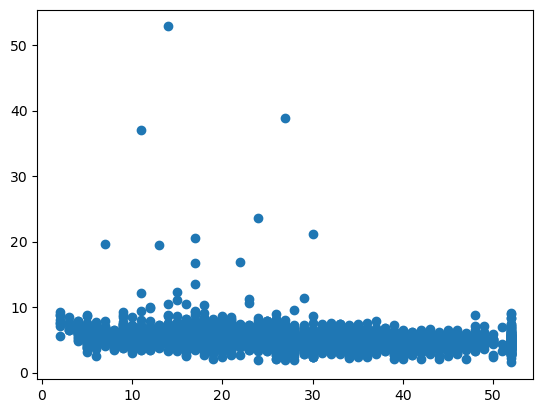

In [95]:
plt.scatter(inliers_houseage, inliers_averooms)
plt.show()

In [75]:
outliers_houseage = hp_attributes[~ransac_model_3.inlier_mask_].HouseAge
outliers_averooms = hp_attributes[~ransac_model_3.inlier_mask_].AveRooms

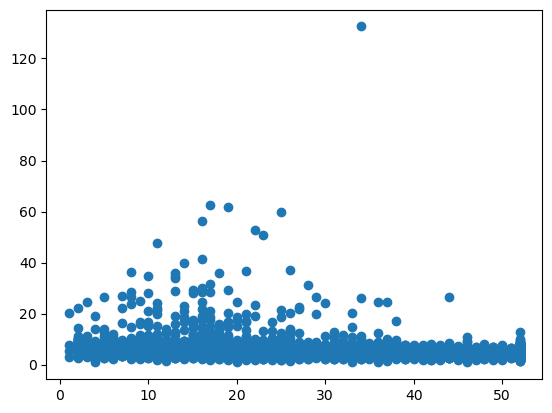

In [94]:
plt.scatter(outliers_houseage, outliers_averooms)
plt.show()

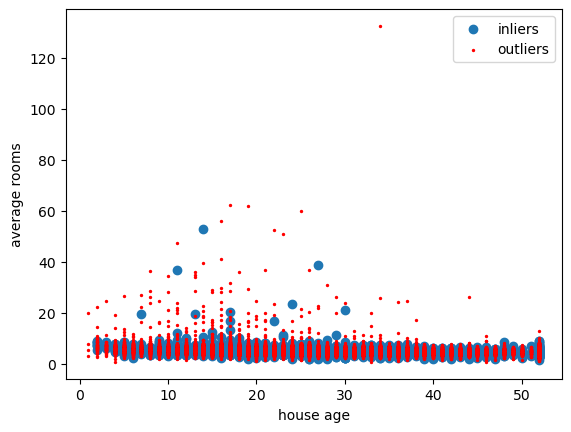

In [96]:
plt.scatter(inliers_houseage, inliers_averooms, label = "inliers")
plt.scatter(outliers_houseage, outliers_averooms, s = 2, color = "red", label = "outliers")
plt.xlabel("house age")
plt.ylabel("average rooms")
plt.legend()
plt.show()

### Polynomial Regression

Polynomial Regression - the relationship between the independent and dependent variables is not linear, but is described by a polynomial of the *n*-th grade. It is suitable for modeling data that has a curvilinear relationship. The independent variables x are raised in desired power n: ($x^{n}$). Its important values to be scaled! 
- Advantages: good model capacity - the model can describe more data well (Statistical power)
- Disadvantages: there are many more features (cursive dimensionality)

In [114]:
# hp_attributes["AveRooms^3"] = hp_attributes.AveRooms ** 3

In [97]:
# ^2
hp_attributes.AveRooms * hp_attributes.AveBedrms

0        7.150416
1        6.062724
2        8.896869
3        6.242364
4        6.791193
           ...   
20635    5.718182
20636    8.044783
20637    5.830689
20638    6.245762
20639    6.107369
Length: 19675, dtype: float64

In [98]:
# ^3
hp_attributes.AveRooms * hp_attributes.AveBedrms ** hp_attributes.MedInc

0         8.495496
1         4.922938
2        13.862516
3         8.660405
4         8.478391
           ...    
20635     6.133587
20636    12.332858
20637     6.312444
20638     7.166938
20639     7.525519
Length: 19675, dtype: float64

In [101]:
poly_transformer = PolynomialFeatures(degree = 3)
poly_transformer.fit(hp_attributes_scaled)

PolynomialFeatures(degree=3)

In [111]:
poly_transformer.get_feature_names_out().shape

(165,)

columns: n = 8, degree: d = 3: 
$$ \frac{(n + d)!}{n! * d!} = \frac{11 * 10 * 9 * 8!}{8! * 3!} = \frac{11 * 10 * 9}{3!} = \frac{990}{6} = 165 $$ 

In [110]:
poly_transformer.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x0^2',
       'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7',
       'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7',
       'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x3^2',
       'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x4^2', 'x4 x5', 'x4 x6',
       'x4 x7', 'x5^2', 'x5 x6', 'x5 x7', 'x6^2', 'x6 x7', 'x7^2', 'x0^3',
       'x0^2 x1', 'x0^2 x2', 'x0^2 x3', 'x0^2 x4', 'x0^2 x5', 'x0^2 x6',
       'x0^2 x7', 'x0 x1^2', 'x0 x1 x2', 'x0 x1 x3', 'x0 x1 x4',
       'x0 x1 x5', 'x0 x1 x6', 'x0 x1 x7', 'x0 x2^2', 'x0 x2 x3',
       'x0 x2 x4', 'x0 x2 x5', 'x0 x2 x6', 'x0 x2 x7', 'x0 x3^2',
       'x0 x3 x4', 'x0 x3 x5', 'x0 x3 x6', 'x0 x3 x7', 'x0 x4^2',
       'x0 x4 x5', 'x0 x4 x6', 'x0 x4 x7', 'x0 x5^2', 'x0 x5 x6',
       'x0 x5 x7', 'x0 x6^2', 'x0 x6 x7', 'x0 x7^2', 'x1^3', 'x1^2 x2',
       'x1^2 x3', 'x1^2 x4', 'x1^2 x5', 'x1^2 x6', 'x1^2 x7', 'x1 x2^2',
       'x1 x2 x3', 'x1 x2 x4', 'x1

In [106]:
poly_regression = LinearRegression()
poly_transformed_attrs = poly_transformer.transform(hp_attributes_scaled)
poly_regression.fit(poly_transformed_attrs, house_values)

LinearRegression()

In [107]:
## better performance:
poly_regression.score(poly_transformed_attrs, house_values)

0.6998591049598404

In [115]:
poly_transformer2 = PolynomialFeatures(degree = 5)
poly_transformer2.fit_transform(hp_attributes_scaled)
poly_transformed_attrs2 = poly_transformer2.transform(hp_attributes_scaled)

poly_regression2 = LinearRegression()
poly_regression2.fit(poly_transformed_attrs2, house_values)
poly_regression2.score(poly_transformed_attrs2, house_values)

0.7901232163298557

In [117]:
poly_transformer2.fit_transform(hp_attributes_scaled).shape

(19675, 1287)

This model 'poly_regression2' is better, but there are much features and the model is slower to train.

## Logistic Regression

Logistic Regression - predicts which class a given observation belongs to. It models the relationship between the independent variables and the dependent binary variable (0 or 1). \
**GLM** combines linear regression with various non-linear functions (such as logistic regression).

In [121]:
mnist_ds = load_digits(as_frame = True)["frame"]

In [127]:
mnist_ds.sample(1)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
114,0.0,0.0,4.0,9.0,13.0,5.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,10.0,16.0,8.0,0.0,0.0,8


In [136]:
example1 = mnist_ds.loc[1170].values[:-1].reshape(8, 8)
ex1_target = mnist_ds.loc[1170].target
example2 = mnist_ds.loc[500].values[:-1].reshape(8, 8)
ex2_target = mnist_ds.loc[500].target

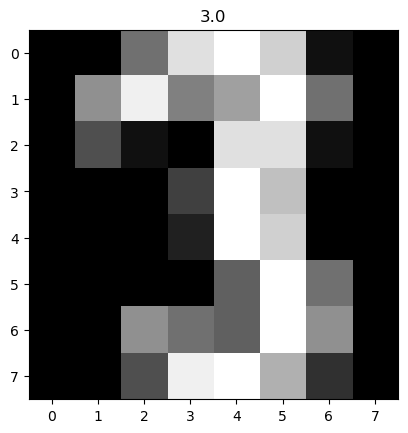

In [137]:
plt.imshow(example1, cmap= "grey")
plt.title(ex1_target)
plt.show()

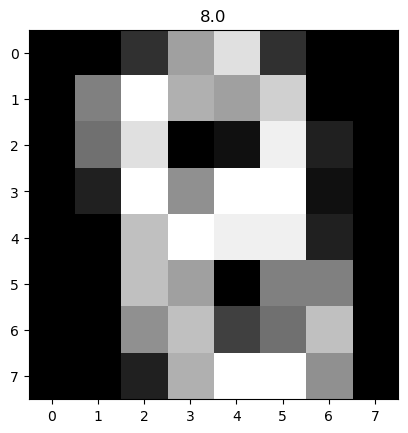

In [138]:
plt.imshow(example2, cmap= "grey")
plt.title(ex2_target)
plt.show()

In [143]:
# dataset is balanced
mnist_ds.target.value_counts()

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [147]:
digits_classifier = LogisticRegression(C= 1e12)
digits_classifier.fit(mnist_ds.drop(columns = "target"), mnist_ds.target)

LogisticRegression(C=1000000000000.0)

In [149]:
# there are 10 models here:
digits_classifier.coef_.shape

(10, 64)

In [151]:
digits_classifier.intercept_

array([-0.00699112, -0.2808233 , -0.01281669,  0.05335594,  0.25952637,
        0.00496514, -0.08420006,  0.06252163,  0.16795635, -0.16349427])